In [ ]:
# IMPORTANT: SOME KAGGLE DATA SOURCES ARE PRIVATE
# RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES.
import kagglehub
kagglehub.login()


In [ ]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

rambhatt18_pred_dataset_path = kagglehub.dataset_download('rambhatt18/pred-dataset')

print('Data source import complete.')


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/pred-dataset/Churn_Modelling.csv


In [ ]:
df=pd.read_csv('/kaggle/input/pred-dataset/Churn_Modelling.csv')

In [ ]:
df.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
df.duplicated().sum()

0

In [ ]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [ ]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [ ]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [ ]:
df.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [ ]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=pd.get_dummies(df,columns=['Geography','Gender'],drop_first=True)

In [ ]:
x=df.drop(columns=['Exited'])
y=df['Exited']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [ ]:
x

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,False,False,True
9996,516,35,10,57369.61,1,1,1,101699.77,False,False,True
9997,709,36,7,0.00,1,0,1,42085.58,False,False,False
9998,772,42,3,75075.31,2,1,0,92888.52,True,False,True


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [ ]:
x_train.shape

(8000, 11)

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler=StandardScaler()

In [ ]:
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [ ]:
x_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [ ]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

2025-06-25 11:14:47.125507: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750850087.418527      35 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750850087.501712      35 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
model=Sequential()

model.add(Dense(11,activation='relu',input_dim=11))
model.add(Dense(11,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 276 (1.08 KB)

 Trainable params: 276 (1.08 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss='binary_crossentropy',optimizer='Adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8665 - loss: 0.3273 - val_accuracy: 0.8487 - val_loss: 0.3527
Epoch 2/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8633 - loss: 0.3195 - val_accuracy: 0.8494 - val_loss: 0.3556
Epoch 3/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8700 - loss: 0.3200 - val_accuracy: 0.8512 - val_loss: 0.3509
Epoch 4/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8586 - loss: 0.3289 - val_accuracy: 0.8469 - val_loss: 0.3516
Epoch 5/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8675 - loss: 0.3134 - val_accuracy: 0.8475 - val_loss: 0.3511
Epoch 6/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8631 - loss: 0.3355 - val_accuracy: 0.8506 - val_loss: 0.3505
Epoch 7/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8592 - loss: 0.3327 - val_accuracy: 0.8494 - val_loss: 0.3537
Epoch 8/100
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8660 - loss: 0.3255 - val_accu

In [ ]:
model.layers[0].get_weights()

[array([[-0.42084107,  0.00132665, -0.3041111 , -0.01660636, -0.4797369 ,
          0.09314981, -0.07219518,  0.0913953 ,  0.8906173 ,  0.12227698,
         -0.19052014],
        [ 0.2341709 ,  0.5151895 ,  0.19396366,  0.35966697, -0.9407365 ,
         -1.1942414 , -0.18047436, -0.15943259, -0.79532367, -0.6596028 ,
          1.0972904 ],
        [ 0.7958073 ,  0.05938367,  0.11615931,  0.03292874,  0.3584886 ,
         -0.11349349,  0.2763125 , -0.31361264, -0.22005099, -0.07510611,
          0.25921714],
        [-0.16043112,  0.27741665,  0.47546867, -0.41746548, -0.4063319 ,
          0.37806457, -0.52840865, -0.6739074 ,  0.04318858, -0.3581863 ,
         -0.33873722],
        [ 0.58958304,  1.2800242 , -0.59855324, -1.2709891 ,  0.75035733,
         -0.75174654, -0.2968521 ,  0.1507098 ,  0.24314019,  0.39316505,
         -0.706507  ],
        [ 0.88021636, -0.16849314,  0.38513213, -0.22157823, -0.09240314,
          0.57196826, -0.45012826,  0.96290964, -0.77287173, -0.4279523

In [ ]:
model.layers[1].get_weights()

[array([[ 0.16265672, -0.22221117,  0.33917895,  0.20843278,  0.28979206,
          0.09596244,  0.5232905 ,  0.9391831 ,  0.37417355, -0.8371066 ,
          0.1584322 ],
        [ 0.8398016 ,  0.5256613 ,  0.06056748, -0.06714498,  0.8930177 ,
         -0.5692258 ,  0.42572942,  0.54567236, -0.82108206,  0.86160976,
         -0.05410841],
        [ 0.39244595, -0.10616935,  0.06426784,  0.23729537,  0.18895178,
          0.40100768, -1.0176733 , -0.21406674,  0.13627362, -0.26659608,
          0.24308343],
        [ 0.59300554, -0.29991227, -0.36025524, -0.02972866, -0.22799754,
         -0.3602889 ,  0.7767459 , -0.36955842, -0.02426049, -0.790654  ,
          0.04125587],
        [ 0.01584289, -0.21413691, -0.00624644, -0.49084327, -0.01589786,
          0.5908167 ,  0.61255187, -0.81841105, -0.21670482,  0.11707781,
          0.2743842 ],
        [-0.8632301 ,  0.4660375 , -0.15759523,  0.4841409 ,  0.27559593,
         -0.18708797, -0.13818805,  0.02400576,  0.592456  ,  0.2191795

In [ ]:
y_log=model.predict(x_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
y_pred=np.where(y_log>0.5,1,0)

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.863

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
history.history

{'accuracy': [0.867968738079071,
  0.8670312762260437,
  0.8692187666893005,
  0.8665624856948853,
  0.8667187690734863,
  0.8667187690734863,
  0.8676562309265137,
  0.8684375286102295,
  0.8667187690734863,
  0.8698437213897705,
  0.8682812452316284,
  0.8668749928474426,
  0.8676562309265137,
  0.8675000071525574,
  0.8662499785423279,
  0.8689062595367432,
  0.8690624833106995,
  0.8693749904632568,
  0.8670312762260437,
  0.8656250238418579,
  0.8685937523841858,
  0.8685937523841858,
  0.8685937523841858,
  0.8678125143051147,
  0.8660937547683716,
  0.8685937523841858,
  0.8682812452316284,
  0.8670312762260437,
  0.8678125143051147,
  0.8684375286102295,
  0.866406261920929,
  0.8689062595367432,
  0.8689062595367432,
  0.8676562309265137,
  0.8662499785423279,
  0.8684375286102295,
  0.8673437237739563,
  0.8673437237739563,
  0.8695312738418579,
  0.8676562309265137,
  0.867968738079071,
  0.8693749904632568,
  0.8681250214576721,
  0.8678125143051147,
  0.8667187690734863,
 

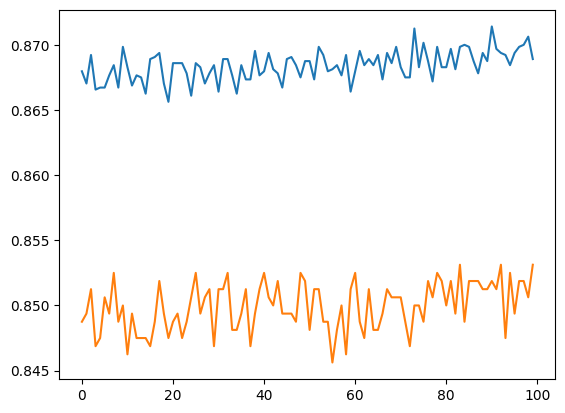

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])